In [253]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#  matplotlib.style.use('ggplot')
%matplotlib inline

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
import os
os.chdir("/home/vladimir/Downloads")


In [256]:
df = pd.read_csv('Ch.csv', sep=';')
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


сразу удалим ненужные столбцы

In [257]:
df =  df.drop(columns=["date1","date2","x1", "x2","x4"])

Text(0, 0.5, 'процент загруженности')

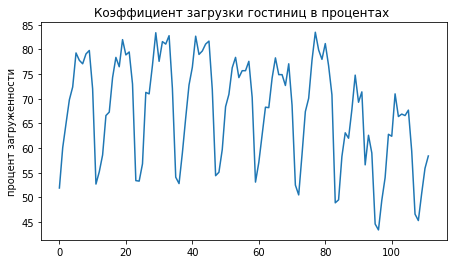

In [258]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
df['x3'].plot(ax=ax1)
ax1.set_title(u'Коэффициент загрузки гостиниц в процентах ')
ax1.set_ylabel(u'процент загруженности')


Построим графики коэффициента загрузки.
Надо разгадать тип тренда (линейный или нет) и характер сезонности (аддитивный или мультипликативный).

На первом графике для исходного ряда явного тренда нет, сезонность похожа на аддитивную.
Ряд трижды меняет свой характер, поэтому мы вынуждены взять только часть, относящуюся к последним трём годам.

In [259]:
df=df[72:].head(42)

In [260]:
df['month_num'] = range(1, len(df) + 1)
df.head()

,x3,month_num
72,50.5,1
73,58.7,2
74,67.4,3
75,70.1,4
76,77.8,5


In [261]:
df["m01"] = (df['month_num']%12==1).astype('uint8')
df["m02"] = (df['month_num']%12==2).astype('uint8')
df["m03"] = (df['month_num']%12==3).astype('uint8')
df["m04"] = (df['month_num']%12==4).astype('uint8')
df["m05"] = (df['month_num']%12==5).astype('uint8')
df["m06"] = (df['month_num']%12==6).astype('uint8')
df["m07"] = (df['month_num']%12==7).astype('uint8')
df["m08"] = (df['month_num']%12==8).astype('uint8')
df["m09"] = (df['month_num']%12==9).astype('uint8')
df["m10"] = (df['month_num']%12==10).astype('uint8')
df["m11"] = (df['month_num']%12==11).astype('uint8')
df["m12"] = (df['month_num']%12==0).astype('uint8')


In [271]:
df.head()

,x3,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
72,50.5,1,1,0,0,0,0,0,0,0,0,0,0,0
73,58.7,2,0,1,0,0,0,0,0,0,0,0,0,0
74,67.4,3,0,0,1,0,0,0,0,0,0,0,0,0
75,70.1,4,0,0,0,1,0,0,0,0,0,0,0,0
76,77.8,5,0,0,0,0,1,0,0,0,0,0,0,0


In [263]:
#  Создаем таблицу (столбец) откликов.
y = df['x3']

In [264]:
#  Создаем матрицу предикторов.
#  Убираем из нее отклик и столбец индикаторов базового месяца
X = df.drop(columns=["x3", "m03"])

In [265]:
#  Подгонка модели
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [266]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,67.678472
1,month_num,-0.360880
2,m01,-13.646759
3,m02,-6.160880
4,m04,3.585880
5,m05,7.789815
6,m06,15.250694
7,m07,11.044907
8,m08,11.639120
9,m09,8.033333


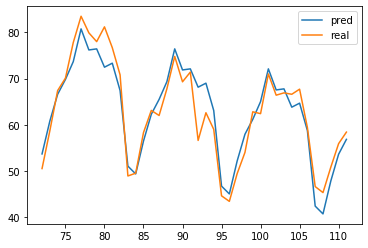

In [267]:
#  Сравним подгонку и ряд логарифмов

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

Переходим к прогнозированию

In [289]:
#  Готовим маторицу значений предикторов df_3 
#  для вычисления прогнозов на 8 месяцев вперед
#  Сначала добавляем в нее время (номер месяца)
df_3 = pd.DataFrame()
df_3['month_num'] = range(41, 49)


In [290]:
#  Добавляем индикаторы месяцев. Базового месяца снова не должно быть
df_3["m01"] = (df_3['month_num']%12==1).astype('uint8')
df_3["m02"] = (df_3['month_num']%12==2).astype('uint8')
#df["m03"] = (df['month_num']%12==3).astype('uint8')
df_3["m04"] = (df_3['month_num']%12==4).astype('uint8')
df_3["m05"] = (df_3['month_num']%12==5).astype('uint8')
df_3["m06"] = (df_3['month_num']%12==6).astype('uint8')
df_3["m07"] = (df_3['month_num']%12==7).astype('uint8')
df_3["m08"] = (df_3['month_num']%12==8).astype('uint8')
df_3["m09"] = (df_3['month_num']%12==9).astype('uint8')
df_3["m10"] = (df_3['month_num']%12==10).astype('uint8')
df_3["m11"] = (df_3['month_num']%12==11).astype('uint8')
df_3["m12"] = (df_3['month_num']%12==0).astype('uint8')

In [291]:
df_3.head(8)

,month_num,m01,m02,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,41,0,0,0,1,0,0,0,0,0,0,0
1,42,0,0,0,0,1,0,0,0,0,0,0
2,43,0,0,0,0,0,1,0,0,0,0,0
3,44,0,0,0,0,0,0,1,0,0,0,0
4,45,0,0,0,0,0,0,0,1,0,0,0
5,46,0,0,0,0,0,0,0,0,1,0,0
6,47,0,0,0,0,0,0,0,0,0,1,0
7,48,0,0,0,0,0,0,0,0,0,0,1


In [292]:
#  Прогноз для исходного ряда
model.predict(df_3)


array([60.67222222, 67.77222222, 63.20555556, 63.43888889, 59.47222222,
       60.33888889, 54.40555556, 38.03888889])

In [293]:
#  матрица с подгонкой
pred['forecast'] = np.nan


In [294]:
pred.head()

,pred,real,forecast
72,53.670833,50.5,NaN
73,60.795833,58.7,NaN
74,66.595833,67.4,NaN
75,69.820833,70.1,NaN
76,73.663889,77.8,NaN


In [295]:
#  матрица с прогнозом ()
#  порядок столбцов не важен. 
#  Имена столбцов должны быть как в матрице pred выше

df_4 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
df_4['real'] = np.nan
df_4['pred'] = np.nan

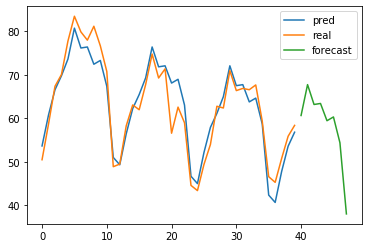

In [296]:
#  объединяем матрицы, задаем новые индексы
pred_1 = pd.concat(
    [pred, df_4],
    sort=False
).reset_index(drop=True)

pred_1.plot()